In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli

In [2]:
# Generates rewards matrix of size (2, ktrials, Nflies)
# rb is a matrix of coeff_rs and zeros, and ry is a multiple of rb (the double if reward_quotient is set at 2)

def create_rewards(ktrials,Nflies):
    r=np.random.randint(0,2,size=(ktrials,Nflies))
    
    rb=coeff_r*r
    ry=reward_quotient*rb 
    
    rewards=np.asarray(np.empty((2,ktrials,Nflies)))
    rewards[0]=rb
    rewards[1]=ry
    return (rewards)

In [3]:
#Generates choice array of size Nflies

def choice (mb,my):
    Py = np.exp(beta * my) / (np.exp(beta * my) + np.exp(beta * mb))
        
    cy = bernoulli.rvs(Py)
    cb = - cy +1
    return [cb,cy]

In [4]:
# Returns the estimated and effective rewards, and the energy spent.
# Respectively 2 arrays of size Nflies, an array of size (ktrials,Nflies) and an array of size Nflies

def r_E_calcul(cb,cy,r_E_variables,rewards,i):
    r_E_variables["expected_rb"] = (1 - lambda_r * cb) * r_E_variables["expected_rb"] + lambda_r*rewards[0][i] * cb
    r_E_variables["expected_ry"] = (1 - lambda_r * cy) * r_E_variables["expected_ry"] + lambda_r*rewards[1][i] * cy
    
    r_E_variables["E"] = r_E_variables["E"] + (abs(r_E_variables["dmb"]) + abs(r_E_variables["dmy"]))*energy_factor
    
    r_E_variables["reward_received"][i] = rewards[0][i]*cb+rewards[1][i]*cy
      
    return[r_E_variables["expected_rb"],r_E_variables["expected_ry"],r_E_variables["reward_received"], r_E_variables["E"]]

In [5]:
# Generates an array of the weights at each time step, of size (2,ktrials)

def weights(rewards, beta, eps, lambda_r, lambda_ARM):
    m_max=1
    x=1
    
    mb = np.zeros(Nflies)
    my = np.zeros(Nflies)
    
    r_E_variables = { "expected_rb" : np.zeros(Nflies),
                    "expected_ry" : np.zeros(Nflies),
                    "reward_received" : np.empty((ktrials,Nflies)),
                    "E" : np.zeros(Nflies)}
    
    weights = np.empty((2,ktrials,Nflies))
    expected_rewards = np.empty((2,ktrials))
    
    for i in range (ktrials) :
        
        [cb,cy]=choice(mb,my)
        
        mb -= mb * lambda_ARM
        r_E_variables["dmb"] = cb * eps * (rewards[0][i] - r_E_variables["expected_rb"]) * (x - mb/m_max)
        
        b_positive_correction=np.where(mb + r_E_variables["dmb"] < 0)
        r_E_variables["dmb"][b_positive_correction]= 0 - mb[b_positive_correction]
        
        b_max_correction=np.where(mb + r_E_variables["dmb"] > m_max)
        r_E_variables["dmb"][b_max_correction]= m_max - mb[b_max_correction]
        
        mb += r_E_variables["dmb"]
        
        my -= my * lambda_ARM
        r_E_variables["dmy"] = cy * eps * (rewards[1][i] - r_E_variables["expected_ry"]) * (x - my/m_max)
        
        y_positive_correction=np.where(my + r_E_variables["dmy"] < 0)
        r_E_variables["dmy"][y_positive_correction]= 0 - my[y_positive_correction]
        
        y_max_correction=np.where(my + r_E_variables["dmy"] > m_max)
        r_E_variables["dmy"][y_max_correction]= m_max - my[y_max_correction]
        
        my += r_E_variables["dmy"]
    
        [r_E_variables["expected_rb"],r_E_variables["expected_ry"],r_E_variables["reward_received"], r_E_variables["E"]]=r_E_calcul(cb,cy,r_E_variables,rewards,i)
        
        weights[0,i] = mb
        weights[1,i] = my
        
    return weights

In [6]:
# Parameters setting
Nflies = 100
ktrials = 200
lambda_r=0.1
beta=7
eps = 0.01
coeff_r = 10/3
reward_quotient = 2
energy_factor = 30

Text(0.5, 1.0, '(C) Blue weights across trials epsilon * mean R = 10')

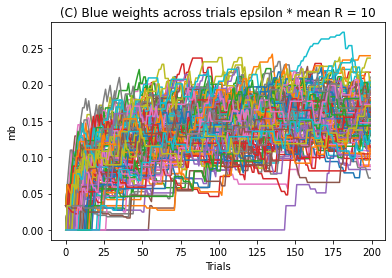

In [7]:
# Plot of the cumulative blue weights as a function of trials, for each fly
for i in range (Nflies):
    plt.plot(weights(create_rewards(ktrials,Nflies), beta, eps, lambda_r, 0)[0,:,i])
plt.xlabel("Trials")
plt.ylabel("mb")
plt.title("(C) Blue weights across trials epsilon * mean R = 10")


Text(0.5, 1.0, '(D) Yellow weights across trials, epsilon * mean R = 10')

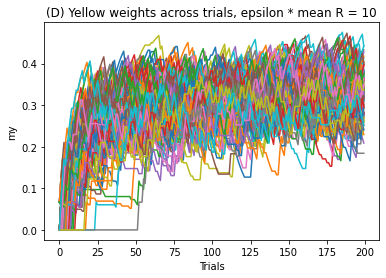

In [8]:
# Plot of the yellow weights as a function of trials, for each fly
for i in range (Nflies):
    plt.plot(weights(create_rewards(ktrials,Nflies), beta, eps, lambda_r, 0)[1,:,i])
plt.xlabel("Trials")
plt.ylabel("my")
plt.title("(D) Yellow weights across trials, epsilon * mean R = 10")